# <center> <b> LECTURE 03: BTVN_L11_DAO_MINH_THUAN

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import data practice sales
df = pd.read_csv("Data_Practices_Sales.csv")

In [4]:
# overview data
df.head()

,Order Line,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Category,Sub-Category,Sales,Quantity,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,Furniture,Bookcases,261.96,2,41.91
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,Furniture,Chairs,731.94,3,219.58
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,OFF-LA-10000240,Office Supplies,Labels,14.62,2,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,FUR-TA-10000577,Furniture,Tables,957.58,5,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,OFF-ST-10000760,Office Supplies,Storage,22.37,2,2.52


In [5]:
#check each column's type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Line    9994 non-null   int64  
 1   Order ID      9992 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   Product ID    9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9991 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Profit        9994 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 937.1+ KB


In [ ]:
# Check the statistics
df.describe()

,Order Line,Sales,Quantity,Profit
count,9994.000000,9991.000000,9994.000000,9994.000000
mean,4997.500000,229.605663,3.789574,28.656973
std,2885.163629,622.679465,2.225110,234.260203
min,1.000000,0.440000,1.000000,-6599.980000
25%,2499.250000,17.280000,2.000000,1.730000
50%,4997.500000,54.480000,3.000000,8.665000
75%,7495.750000,209.940000,5.000000,29.360000
max,9994.000000,22638.480000,14.000000,8399.980000


In [6]:
# Lấy thông tin NULL của frame
df.isnull().sum()

,0
Order Line,0
Order ID,2
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Product ID,0
Category,0
Sub-Category,0
Sales,3


In [7]:
# Lấy ra thông tin NULL của column Order ID
df[df['Order ID'].isnull()]

,Order Line,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Category,Sub-Category,Sales,Quantity,Profit
20,21,NaN,8/27/2014,09/01/2014,Second Class,ZD-21925,OFF-BI-10002215,Office Supplies,Binders,22.72,4,7.38
21,22,NaN,12/09/2016,12/13/2016,Standard Class,KB-16585,OFF-AR-10000246,Office Supplies,Art,19.46,7,5.06


In [8]:
# Lấy ra thông tin NULL của column Sales
df[df['Sales'].isnull()]

,Order Line,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Category,Sub-Category,Sales,Quantity,Profit
27,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,FUR-BO-10004834,Furniture,Bookcases,NaN,7,-1665.05
29,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,FUR-FU-10004848,Furniture,Furnishings,NaN,3,15.53
30,31,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,OFF-EN-10001509,Office Supplies,Envelopes,NaN,2,1.10


In [9]:
# Xoá bỏ các dữ liệu bị trống
df.dropna(inplace= True)

In [10]:
# Check lại dữ liệu đã được xoá các hàng trống chưa
df.isnull().sum()

,0
Order Line,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Product ID,0
Category,0
Sub-Category,0
Sales,0


In [13]:
# Tạo 1 frame mới chỉ có 4 coloumn 'Order Line', 'Sales', 'Quantity', 'Profit'
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Order Line,Sales,Quantity,Profit
Order Line,1.000000,-0.000778,-0.003705,0.011225
Sales,-0.000778,1.000000,0.200414,0.484151
Quantity,-0.003705,0.200414,1.000000,0.067495
Profit,0.011225,0.484151,0.067495,1.000000


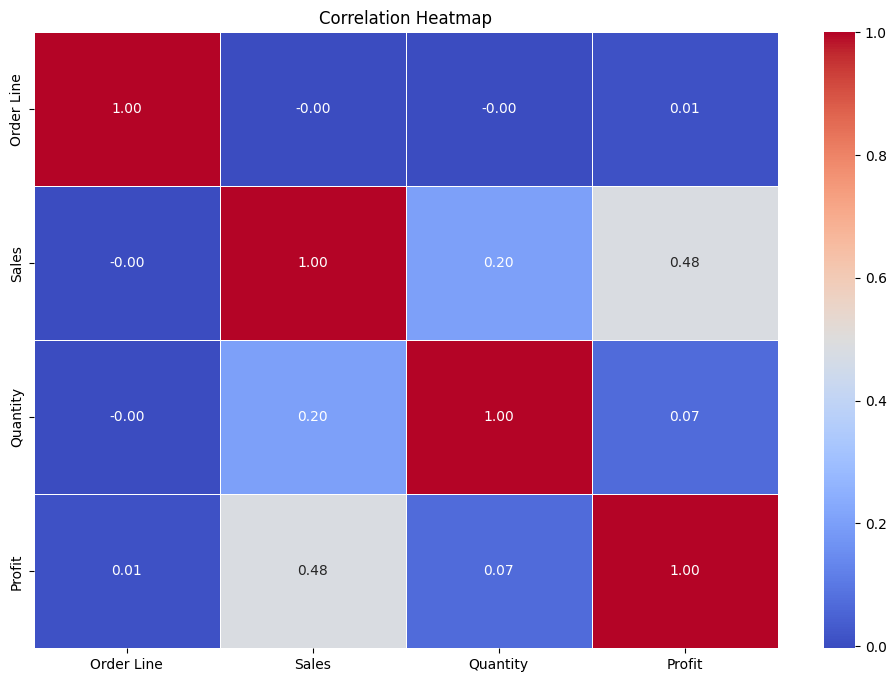

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Kiểm tra thông tin dupplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
# Có tất cả bao nhiêu đơn hàng? Có tất cả bao nhiêu khách hàng đã mua hàng?
totalOrder = df['Order ID'].nunique()
totalCustomer = df['Customer ID'].nunique()
print(f"Số lượng đơn hàng: {totalOrder}")
print(f"Số lượng khách hàng: {totalCustomer}")

Số lượng đơn hàng: 5009
Số lượng khách hàng: 793


In [ ]:
# Bài tập 2: Category nào được mua nhiều nhất?
grouped = df.groupby('Category').agg(countCategory = ('Category', 'count'))\
            .sort_values('countCategory', ascending= False)\
            .reset_index()\
            .loc[0,'Category']
print(f"Category được mua nhiều nhất: {grouped}")

Category được mua nhiều nhất: Office Supplies


In [ ]:
# Bài tập 3: Subcategory nào được mua nhiều nhất?
grouped = df.groupby('Sub-Category').agg(countCategory = ('Sub-Category', 'count'))\
            .sort_values('countCategory', ascending= False)\
            .reset_index()\
            .loc[0, 'Sub-Category']
print(f"Subcategory được mua nhiều nhất: {grouped}")

Subcategory được mua nhiều nhất: Binders


In [ ]:
# Bài tập 4: Tổng doanh số của tất cả các đơn hàng là bao nhiêu?
sumSales = df['Sales'].sum()
print(f"Tổng doanh số: {sumSales}")

Tổng doanh số: 2293990.18


In [ ]:
# Bài tập 5: Tổng lợi nhuận của tất cả các đơn hàng là bao nhiêu?
sumProfit = df['Profit'].sum()
print(f"Tổng doanh số: {sumProfit}")

Tổng doanh số: 286397.79000000004


In [ ]:
# Bài tập 6: Tổng doanh số và lợi nhuận của từng Category là bao nhiêu?
grouped = df.groupby('Category').agg(
             totalSales = ('Sales', 'sum'),
             totalProfit = ('Profit', 'sum'),
)
grouped

,totalSales,totalProfit
Category,,
Furniture,738792.35,18451.25
Office Supplies,719043.73,122490.88
Technology,836154.10,145455.66
